# First lets see how data looks like in Phantasus

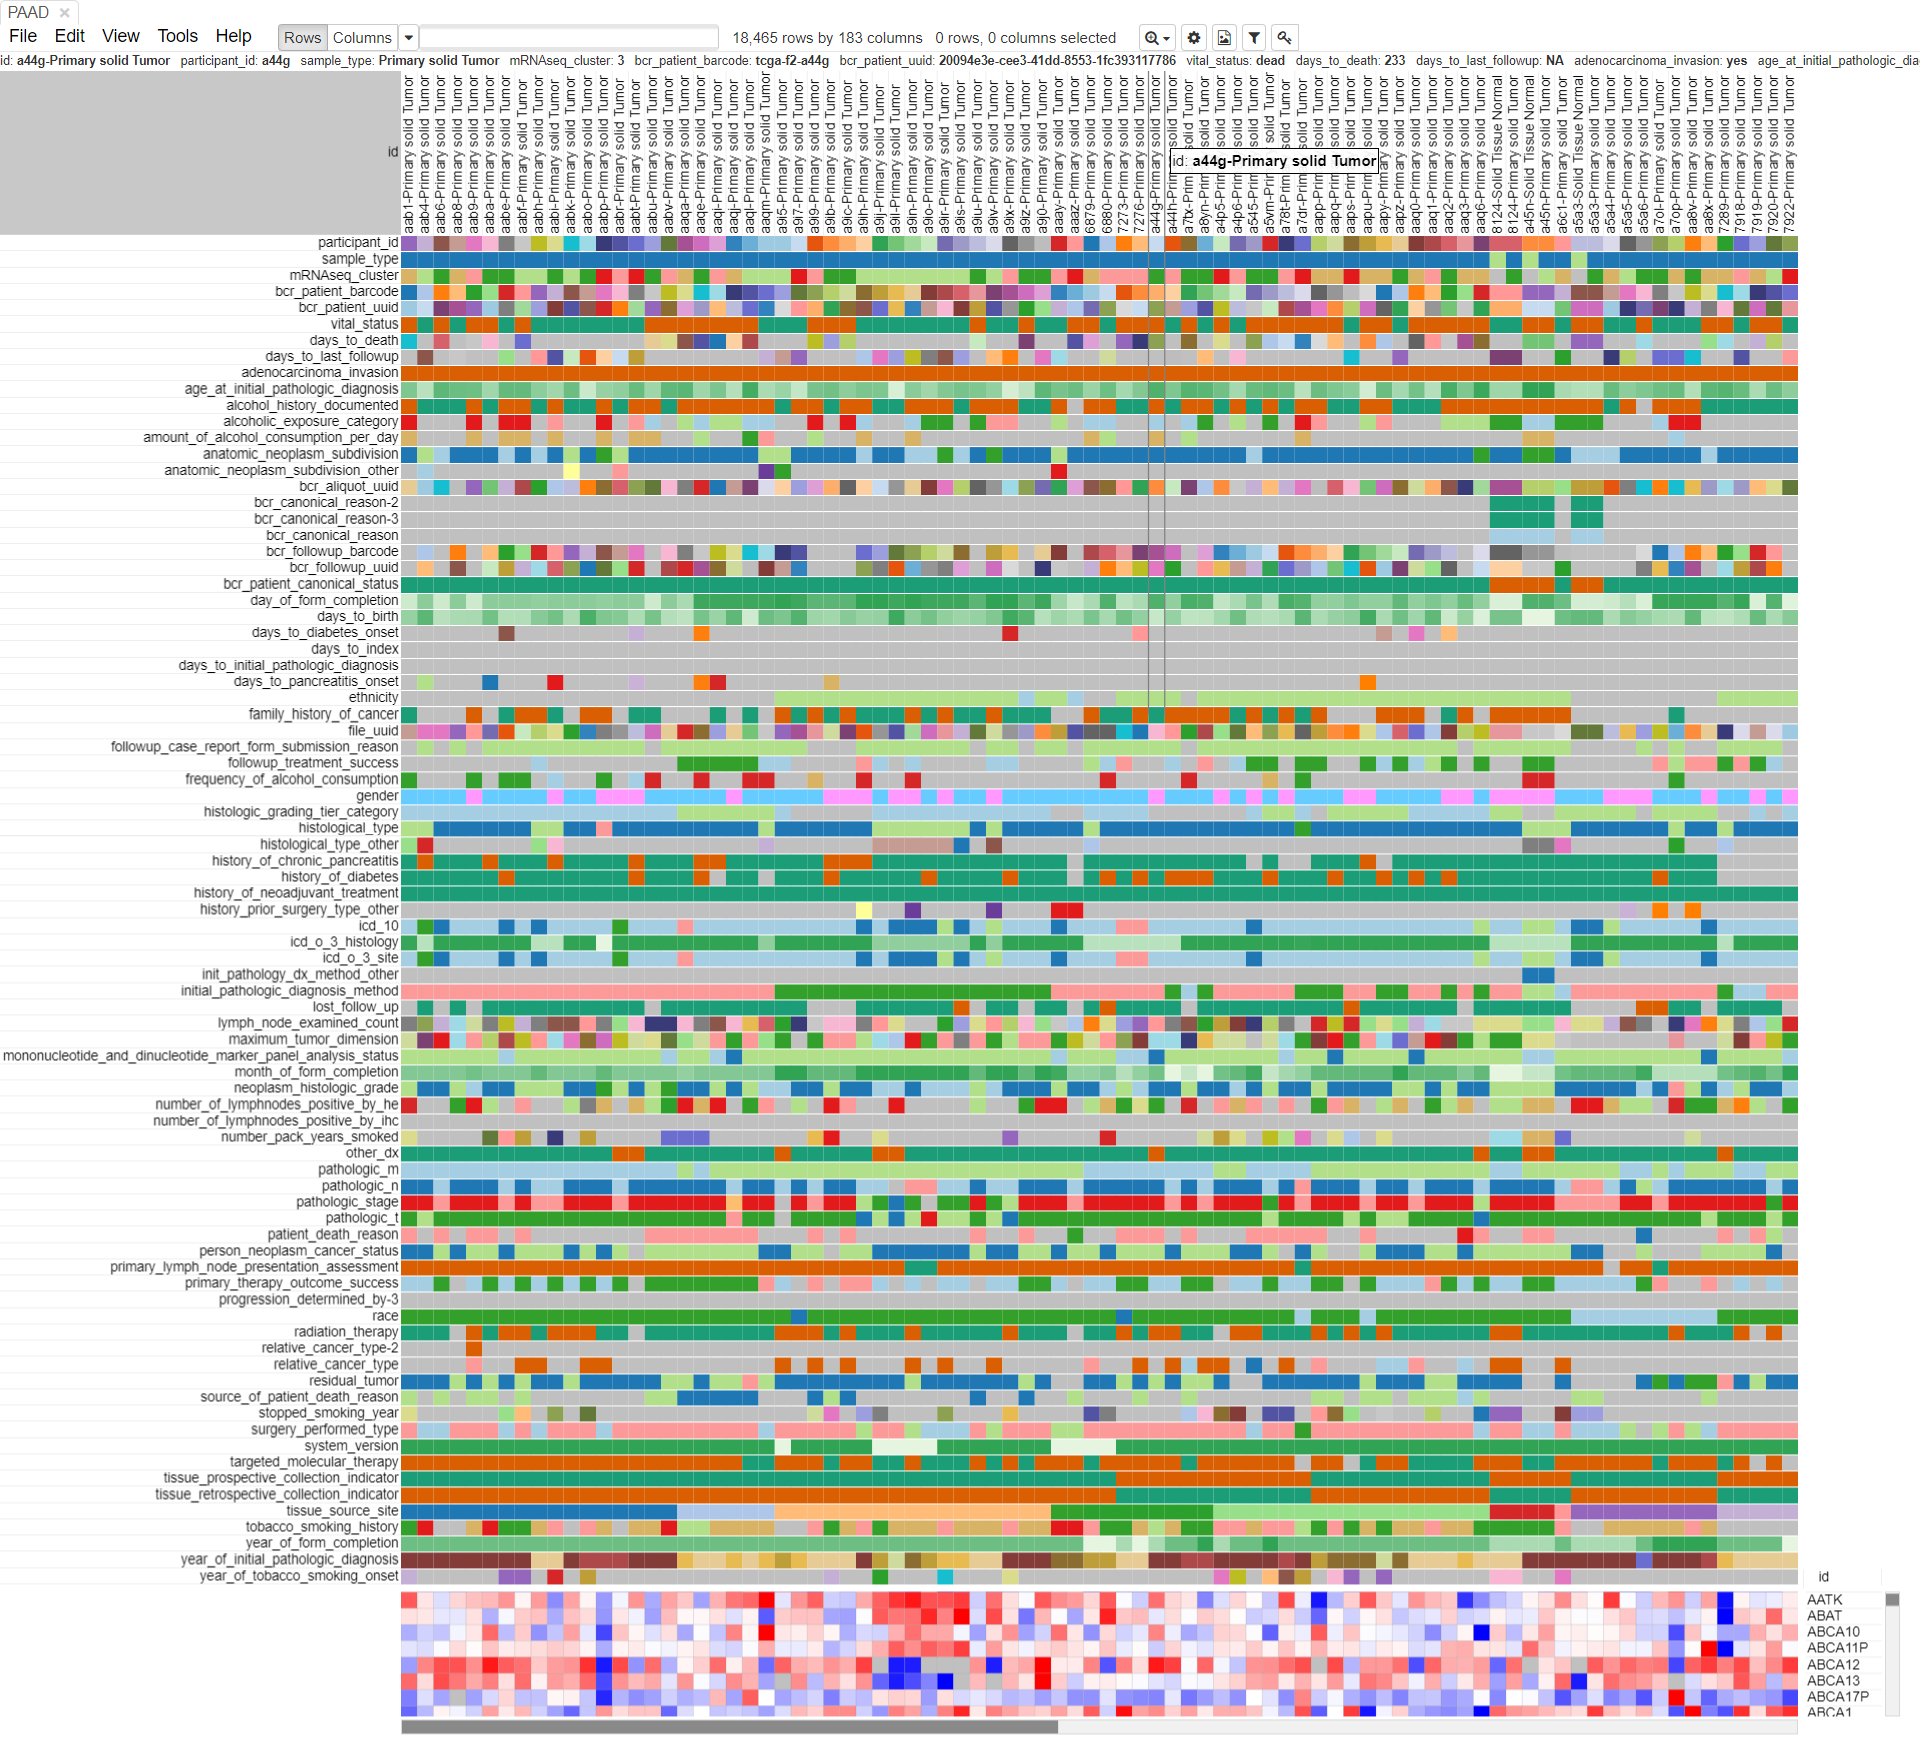

In [1]:
from IPython.display import Image
Image(filename='data.PNG') 

# Thought after observing the dataset at first glance

### The above picture is divided into two parts
- The upper part have rows listed in left side and second part rows listed on right side.

- The first part is a other info of person in which columns are participant ids and column contains various meta data of that persons.Also each info have different categories of value which we can see by hovering mouse over it.

- The second part is the RNA sequencing reads of different persons.

# Loading libraries

In [2]:
from cmapPy.pandasGEXpress.parse_gct import parse
from cmapPy.pandasGEXpress.write_gct import write
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Loading the dataset and further oberving the dataset

In [3]:
data = parse('PAAD.gct')

### Lets check the metadata hidden in rows and columns

In [4]:
data.row_metadata_df     # No metadata of rows(RNA ids)

rhd
rid
SLC35E2
A1BG
A1CF
A2BP1
A2LD1
...
ZYG11B
ZYX
ZZEF1


In [5]:
data.col_metadata_df  # There is the hidden metadata of columns which we were getting on Phantasus when we
                      # were hovering mouse over it

chd,participant_id,sample_type,mRNAseq_cluster,bcr_patient_barcode,bcr_patient_uuid,vital_status,days_to_death,days_to_last_followup,additional_studies,adenocarcinoma_invasion,...,tobacco_smoking_history,total_dose,total_dose_units,tumor_tissue_site,tumor_type,withdrawn,year_of_dcc_upload,year_of_form_completion,year_of_initial_pathologic_diagnosis,year_of_tobacco_smoking_onset
cid,,,,,,,,,,,,,,,,,,,,,
aab1-Primary solid Tumor,aab1,Primary solid Tumor,1.0,tcga-2j-aab1,75119d1a-93e5-4ae7-9d60-69ee929a0772,dead,66.0,NaN,NaN,yes,...,3.0,NaN,NaN,pancreas,primary,false,2016,2014,2012.0,1962.0
aab4-Primary solid Tumor,aab4,Primary solid Tumor,2.0,tcga-2j-aab4,33833131-1482-42d5-9cf5-01cade540234,alive,NaN,729.0,NaN,yes,...,5.0,NaN,NaN,pancreas,primary,false,2016,2014,2012.0,NaN
aab6-Primary solid Tumor,aab6,Primary solid Tumor,3.0,tcga-2j-aab6,70797499-16e6-48cc-8ae4-1e692713dad3,dead,293.0,NaN,NaN,yes,...,NaN,NaN,NaN,pancreas,primary,false,2016,2014,2012.0,NaN
aab8-Primary solid Tumor,aab8,Primary solid Tumor,1.0,tcga-2j-aab8,2e8f90f4-aed3-43b0-985c-dfdc2581f24f,alive,NaN,80.0,NaN,yes,...,NaN,NaN,NaN,pancreas,primary,false,2016,2014,2012.0,NaN
aab9-Primary solid Tumor,aab9,Primary solid Tumor,4.0,tcga-2j-aab9,a5748656-5330-417a-8938-01f69ddb3576,dead,627.0,NaN,NaN,yes,...,1.0,NaN,NaN,pancreas,primary,false,2016,2014,2012.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
a89d-Solid Tissue Normal,a89d,Solid Tissue Normal,NaN,tcga-yb-a89d,b84b58c7-95b8-4162-8e61-414f8fe422c6,alive,NaN,350.0,NaN,yes,...,1.0,NaN,NaN,pancreas,primary,false,2016,2014,2013.0,NaN
a89d-Primary solid Tumor,a89d,Primary solid Tumor,2.0,tcga-yb-a89d,b84b58c7-95b8-4162-8e61-414f8fe422c6,alive,NaN,350.0,NaN,yes,...,1.0,NaN,NaN,pancreas,primary,false,2016,2014,2013.0,NaN
a8sy-Primary solid Tumor,a8sy,Primary solid Tumor,3.0,tcga-yh-a8sy,503d7e36-df78-428d-9971-09ff707645c2,alive,NaN,388.0,NaN,yes,...,1.0,NaN,NaN,pancreas,primary,false,2016,2014,2011.0,NaN


In [6]:
data.data_df    # This is the dataframe consist of RNA seq in rows and person id(cid) in columns

cid,aab1-Primary solid Tumor,aab4-Primary solid Tumor,aab6-Primary solid Tumor,aab8-Primary solid Tumor,aab9-Primary solid Tumor,aaba-Primary solid Tumor,aabe-Primary solid Tumor,aabf-Primary solid Tumor,aabh-Primary solid Tumor,aabi-Primary solid Tumor,...,aauh-Primary solid Tumor,aaui-Primary solid Tumor,aaul-Primary solid Tumor,a8t3-Primary solid Tumor,a8t5-Primary solid Tumor,a89d-Solid Tissue Normal,a89d-Primary solid Tumor,a8sy-Primary solid Tumor,a8lh-Primary solid Tumor,aapl-Primary solid Tumor
rid,,,,,,,,,,,,,,,,,,,,,
SLC35E2,7.45,8.1,7.2,8.0,7.65,8.1,8.2,8.2,7.55,8.45,...,8.45,7.95,8.3,8.05,8.2,7.25,7.4,7.35,7.2,9.05
A1BG,6.40,5.8,6.4,5.8,6.70,6.6,6.3,6.5,5.70,6.30,...,7.10,7.10,6.7,7.00,6.9,7.10,7.3,7.90,6.0,6.90
A1CF,4.70,5.7,3.0,5.1,4.40,4.2,1.6,6.8,6.00,NaN,...,5.40,6.40,6.5,4.40,3.3,3.60,6.2,1.20,4.9,2.00
A2BP1,-1.00,1.1,NaN,NaN,0.10,NaN,NaN,1.7,0.40,-1.50,...,3.50,1.30,-0.3,NaN,2.1,2.00,0.0,NaN,2.0,NaN
A2LD1,7.50,6.8,7.3,7.5,7.40,6.6,7.1,6.8,8.00,5.80,...,6.50,7.30,6.1,6.70,6.5,6.70,6.7,6.50,6.9,6.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYG11B,9.20,9.3,9.4,9.4,9.30,9.9,9.1,9.5,8.90,8.30,...,9.70,9.20,9.5,9.50,9.4,9.40,9.6,9.20,8.3,9.50
ZYX,12.90,12.4,13.5,12.5,13.00,12.2,12.9,12.6,12.70,12.50,...,12.40,12.60,13.5,12.50,12.7,13.60,13.1,13.20,12.3,12.30
ZZEF1,10.10,9.8,9.8,9.7,10.10,10.4,9.7,10.6,10.00,9.90,...,10.60,9.90,9.8,10.30,10.4,10.20,9.9,9.80,9.6,10.90


### Creating separate dataframe of the above stuffs so that we can perform further data analysis on them

In [7]:
col_data = data.col_metadata_df 
rna_data = data.data_df  

### Lets see col_data

In [8]:
print(f'The shape of column metadata is { col_data.shape }')

The shape of column metadata is (183, 124)


In [9]:
# This means the number of participants is 183 because they are present in rows and number of info features of participant is
# 124 (column) because (row x column) = (183, 124)

In [10]:
# Caculating total nan values
nan_col_data = pd.DataFrame(data = col_data.isna().sum()
             , columns = ['Total'])

In [11]:
nan_col_data.sort_values(['Total'],ascending=False) # Some features are NAN for all 183 values

,Total
chd,
secondary_pattern,183
total_dose,183
masaoka_stage,183
clinical_m,183
clinical_n,183
...,...
month_of_dcc_upload,0
month_of_form_completion,0
neoplasm_histologic_grade,0


#### Droping the columns in col_data which have nan value for all 183 rows.

In [12]:
features_drop_col = nan_col_data[nan_col_data.Total == 183]

In [13]:
features_drop_col.index

Index(['additional_studies', 'b_symptoms', 'clinical_m', 'clinical_n',
       'clinical_stage', 'clinical_t', 'course_number', 'days_to_psa', 'drugs',
       'extranodal_involvement', 'follow_ups', 'gleason_score', 'hiv_status',
       'igcccg_stage', 'masaoka_stage',
       'mononucleotide_marker_panel_analysis_status', 'number_cycles',
       'prescribed_dose', 'prescribed_dose_units', 'primary_pattern',
       'psa_value', 'radiation_type_notes', 'radiations', 'regimen_number',
       'route_of_administration', 'secondary_pattern', 'serum_markers',
       'tertiary_pattern', 'therapy_type_notes', 'total_dose',
       'total_dose_units'],
      dtype='object', name='chd')

In [14]:
col_data = col_data.drop(features_drop_col.index, axis=1)

In [15]:
print(f'The shape of column metadata is { col_data.shape }')  # New shape of col_data after dropping

The shape of column metadata is (183, 93)


### visualize rna_data

In [16]:
print(f'The shape of column metadata is { rna_data.shape }')

The shape of column metadata is (18465, 183)


In [17]:
rna_data = rna_data.T

In [18]:
#rna_data.plot(kind="hist", legend=Non e, bins=20, color='k')
#rna_data.plot(kind="kde", legend=None);

#### Calculating and dropping rows with nans

In [19]:
nan_rna_data = pd.DataFrame(data = rna_data.isna().sum()
             , columns = ['Total'])

In [20]:
nan_rna_data

,Total
rid,
SLC35E2,0
A1BG,0
A1CF,2
A2BP1,42
A2LD1,0
...,...
ZYG11B,0
ZYX,0
ZZEF1,0


In [21]:
nan_rna_data.sort_values(['Total'],ascending=False) 

,Total
rid,
NCRNA00114,128
DEFA4,128
AIPL1,128
HESRG,128
SOX3,128
...,...
GTF3C5,0
GTF3C6,0
GTPBP10,0


In [22]:
# Calculating total rows haveing nan values
count = 0
for num in rna_data.isna().sum().values:
    if num!=0 :
        count= count+1
print(count)

4367


In [23]:
rna_data = rna_data.T
rna_data = rna_data.dropna()

In [24]:
rna_data

cid,aab1-Primary solid Tumor,aab4-Primary solid Tumor,aab6-Primary solid Tumor,aab8-Primary solid Tumor,aab9-Primary solid Tumor,aaba-Primary solid Tumor,aabe-Primary solid Tumor,aabf-Primary solid Tumor,aabh-Primary solid Tumor,aabi-Primary solid Tumor,...,aauh-Primary solid Tumor,aaui-Primary solid Tumor,aaul-Primary solid Tumor,a8t3-Primary solid Tumor,a8t5-Primary solid Tumor,a89d-Solid Tissue Normal,a89d-Primary solid Tumor,a8sy-Primary solid Tumor,a8lh-Primary solid Tumor,aapl-Primary solid Tumor
rid,,,,,,,,,,,,,,,,,,,,,
SLC35E2,7.45,8.1,7.2,8.0,7.65,8.1,8.2,8.2,7.55,8.45,...,8.45,7.95,8.3,8.05,8.2,7.25,7.4,7.35,7.2,9.05
A1BG,6.40,5.8,6.4,5.8,6.70,6.6,6.3,6.5,5.70,6.30,...,7.10,7.10,6.7,7.00,6.9,7.10,7.3,7.90,6.0,6.90
A2LD1,7.50,6.8,7.3,7.5,7.40,6.6,7.1,6.8,8.00,5.80,...,6.50,7.30,6.1,6.70,6.5,6.70,6.7,6.50,6.9,6.70
A2M,14.30,14.0,13.1,13.8,14.60,13.3,13.4,14.2,13.90,11.90,...,14.50,14.30,14.5,14.20,14.3,14.90,14.5,13.00,12.1,13.30
A4GALT,10.60,10.2,10.1,8.6,10.10,9.3,9.5,8.4,8.40,7.90,...,9.10,9.50,10.0,9.50,9.1,10.50,9.8,10.80,8.3,9.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZXDC,9.90,10.0,10.0,9.7,9.90,10.6,10.1,9.9,9.80,10.70,...,10.10,10.10,9.9,10.10,9.8,9.50,9.5,9.40,9.5,10.40
ZYG11B,9.20,9.3,9.4,9.4,9.30,9.9,9.1,9.5,8.90,8.30,...,9.70,9.20,9.5,9.50,9.4,9.40,9.6,9.20,8.3,9.50
ZYX,12.90,12.4,13.5,12.5,13.00,12.2,12.9,12.6,12.70,12.50,...,12.40,12.60,13.5,12.50,12.7,13.60,13.1,13.20,12.3,12.30


In [25]:
print(f'The shape of column metadata is { rna_data.shape }') # New shape of rna_data

The shape of column metadata is (14098, 183)


#### Finding the columns which contains neuroendocrine to perform the task 1

In [26]:
import math
for feature in list((col_data.T).index):
    try:
        for i in col_data[feature].str.find("neuroendocrine").values:  # String value
            if i!=-1 and math.isnan(i)!= True:
                print(feature)
    except:
        continue

histological_type_other
histological_type_other
histological_type_other
histological_type_other
histological_type_other
histological_type_other
histological_type_other
histological_type_other
histological_type_other


neuroendocrine is mentioned in "histological_type_other" column

In [27]:
import math
for feature in list((col_data.T).index):
    try:
        for i in col_data[feature].str.find("adenocarcinoma").values:  # String value
            if i!=-1 and math.isnan(i)!= True:
                print(feature)
    except:
        continue

histological_type
histological_type
histological_type
histological_type
histological_type
histological_type
histological_type
histological_type
histological_type
histological_type
histological_type
histological_type
histological_type
histological_type
histological_type
histological_type
histological_type
histological_type
histological_type
histological_type
histological_type
histological_type
histological_type
histological_type
histological_type
histological_type
histological_type
histological_type
histological_type
histological_type
histological_type
histological_type
histological_type
histological_type
histological_type
histological_type
histological_type
histological_type
histological_type
histological_type
histological_type
histological_type
histological_type
histological_type
histological_type
histological_type
histological_type
histological_type
histological_type
histological_type
histological_type
histological_type
histological_type
histological_type
histological_type
histologic

adenocarcinoma is mentioned in "histological_type" and "histological_type_other" columns

In [28]:
col_data.histological_type_other.value_counts() # All unique categories in  "histological_type_other"

adenocarcinoma, nos                                                         8
neuroendocrine carcinoma nos                                                5
poorly differentiated pancreatic adenocarcinoma                             2
invasive adenocarcinoma                                                     2
neuroendocrine carcinoma                                                    1
intraductal tubulopapillary neoplasm                                        1
poorly differentiated adenocarcinoma                                        1
ductal and micropapillary                                                   1
invasive, well-differentiated                                               1
adenocarcinoma- nos                                                         1
moderately differentiated ductal adenocarcinoma 60% + neuroendocrine 40%    1
neuroendocrine                                                              1
not specified                                                   

In [29]:
col_data.histological_type.value_counts()       # All unique categories in  "histological_type"

pancreas-adenocarcinoma ductal type                 150
pancreas-adenocarcinoma-other subtype                27
pancreas-colloid (mucinous non-cystic) carcinoma      4
pancreas-undifferentiated carcinoma                   1
Name: histological_type, dtype: int64

In [30]:
# real dataset

In [31]:
rna_data

cid,aab1-Primary solid Tumor,aab4-Primary solid Tumor,aab6-Primary solid Tumor,aab8-Primary solid Tumor,aab9-Primary solid Tumor,aaba-Primary solid Tumor,aabe-Primary solid Tumor,aabf-Primary solid Tumor,aabh-Primary solid Tumor,aabi-Primary solid Tumor,...,aauh-Primary solid Tumor,aaui-Primary solid Tumor,aaul-Primary solid Tumor,a8t3-Primary solid Tumor,a8t5-Primary solid Tumor,a89d-Solid Tissue Normal,a89d-Primary solid Tumor,a8sy-Primary solid Tumor,a8lh-Primary solid Tumor,aapl-Primary solid Tumor
rid,,,,,,,,,,,,,,,,,,,,,
SLC35E2,7.45,8.1,7.2,8.0,7.65,8.1,8.2,8.2,7.55,8.45,...,8.45,7.95,8.3,8.05,8.2,7.25,7.4,7.35,7.2,9.05
A1BG,6.40,5.8,6.4,5.8,6.70,6.6,6.3,6.5,5.70,6.30,...,7.10,7.10,6.7,7.00,6.9,7.10,7.3,7.90,6.0,6.90
A2LD1,7.50,6.8,7.3,7.5,7.40,6.6,7.1,6.8,8.00,5.80,...,6.50,7.30,6.1,6.70,6.5,6.70,6.7,6.50,6.9,6.70
A2M,14.30,14.0,13.1,13.8,14.60,13.3,13.4,14.2,13.90,11.90,...,14.50,14.30,14.5,14.20,14.3,14.90,14.5,13.00,12.1,13.30
A4GALT,10.60,10.2,10.1,8.6,10.10,9.3,9.5,8.4,8.40,7.90,...,9.10,9.50,10.0,9.50,9.1,10.50,9.8,10.80,8.3,9.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZXDC,9.90,10.0,10.0,9.7,9.90,10.6,10.1,9.9,9.80,10.70,...,10.10,10.10,9.9,10.10,9.8,9.50,9.5,9.40,9.5,10.40
ZYG11B,9.20,9.3,9.4,9.4,9.30,9.9,9.1,9.5,8.90,8.30,...,9.70,9.20,9.5,9.50,9.4,9.40,9.6,9.20,8.3,9.50
ZYX,12.90,12.4,13.5,12.5,13.00,12.2,12.9,12.6,12.70,12.50,...,12.40,12.60,13.5,12.50,12.7,13.60,13.1,13.20,12.3,12.30


In [32]:
(rna_data).shape

(14098, 183)

In [33]:
pca = PCA().fit(rna_data.T)

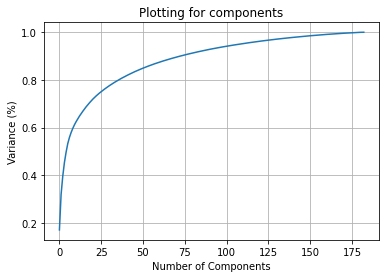

In [34]:
# plotting to see the variance of the data
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.grid()
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Plotting for components')

plt.show()

In [35]:
# Find the number of features for which cummulative variance is exceeds more than 95%
i = 1
for val in (np.cumsum(pca.explained_variance_ratio_)>0.95):
    i = i+1
    if val == True:
        break
print("The number of components for which PCA variance is 95% is",i)

The number of components for which PCA variance is 95% is 110


In [36]:
pca.explained_variance_ratio_.cumsum()

array([0.17050834, 0.31896526, 0.3960237 , 0.45375457, 0.4970019 ,
       0.5329875 , 0.5587617 , 0.5792467 , 0.59671265, 0.6118017 ,
       0.62494916, 0.6367034 , 0.64821225, 0.6585373 , 0.6685348 ,
       0.6781682 , 0.68731135, 0.69577694, 0.70404655, 0.7118905 ,
       0.71947354, 0.726353  , 0.7329376 , 0.73919916, 0.74517393,
       0.7507181 , 0.7562191 , 0.761576  , 0.76672024, 0.7717003 ,
       0.77643317, 0.7810188 , 0.78551847, 0.7899432 , 0.79415154,
       0.7983352 , 0.8024281 , 0.80628103, 0.81004006, 0.8137596 ,
       0.81736124, 0.82092184, 0.82438385, 0.8278064 , 0.831111  ,
       0.8343445 , 0.8375069 , 0.84054786, 0.8435433 , 0.8464947 ,
       0.84933996, 0.8521505 , 0.854927  , 0.85758924, 0.8602143 ,
       0.8627815 , 0.865327  , 0.86778873, 0.8701884 , 0.87256646,
       0.8748952 , 0.87714803, 0.879369  , 0.88156223, 0.8837009 ,
       0.88578504, 0.88785195, 0.88990146, 0.89191204, 0.8938606 ,
       0.89578855, 0.897675  , 0.8995319 , 0.90137666, 0.90318

In [37]:
# Projecting high dimensional data into 111 features using PCA
n_components=111
pca = PCA(n_components)
df_pca = pca.fit_transform(rna_data.T)

Note - No need to normalize because it is already normalized(given in the assignment pdf)

In [38]:
# Creating a dataframe of PCA components
df_pca1=pd.DataFrame(df_pca,columns=['PC'+str(i) for i in range(1,n_components+1)],index=None)

In [39]:
df_pca1

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC102,PC103,PC104,PC105,PC106,PC107,PC108,PC109,PC110,PC111
0,19.377550,-14.983458,-2.223571,-29.369293,1.294303,-0.555353,-13.681499,-10.432129,-0.366908,-5.874004,...,0.564159,0.809301,0.878870,8.430164,-3.712868,-0.208942,-1.379566,-8.858180,1.185587,2.934547
1,6.459746,-7.324428,-1.891171,-27.630133,-16.984564,6.185736,6.002598,-13.808450,-11.949415,-14.811034,...,1.806920,3.910065,1.058807,-3.752239,2.433480,0.402649,-1.063207,2.898595,5.511106,0.132437
2,22.106997,-12.287194,-8.406926,52.940914,-28.743156,-6.388816,12.775007,-13.569392,-22.681679,1.003894,...,-0.901403,0.892597,-2.418264,-1.690125,0.698602,-5.463027,-2.237672,1.201113,3.602277,-0.863360
3,14.004119,-25.846411,2.487061,13.669201,-4.051849,13.900193,-19.943573,6.014192,9.325513,9.484855,...,-2.722112,1.051240,2.487728,-3.251811,-1.169544,-5.321167,12.787906,5.421641,1.673126,0.380824
4,-14.081428,-4.000408,-13.408859,-10.858788,-13.067170,-16.657862,20.383583,9.752651,-0.402873,-2.505475,...,-5.080023,-0.036850,3.999792,5.388753,-0.721132,0.142674,-0.328219,-4.790206,-3.196461,2.007273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,-34.850861,-25.214254,-33.110050,13.119366,-6.847003,-6.903826,-16.482189,7.040029,9.075701,-12.560229,...,0.825163,2.518515,-5.953682,2.155433,-1.063354,7.146783,-3.450171,3.594241,-2.435695,-5.405106
179,-14.902584,-15.042421,-5.855066,-2.621724,-22.331467,-1.177188,-27.397404,-6.215558,-2.953642,-10.324642,...,-1.568303,3.325830,-5.645085,2.649437,3.312587,4.790857,-1.906602,2.453874,0.954957,-3.367192
180,24.656851,-32.878593,-18.901930,47.882309,-23.162596,8.239395,-16.013050,14.242217,12.469558,-2.482996,...,-7.443647,4.196493,-6.753738,-0.460524,-5.688168,4.112465,3.659382,-2.452082,-9.084645,-0.078997
181,85.176308,1.422768,-0.112657,-24.467510,3.776687,19.624189,-2.226934,-23.334051,-5.782189,-1.163755,...,-3.746998,3.056262,0.361163,0.707987,9.238018,-7.157895,1.551920,-5.013595,2.022550,1.609536


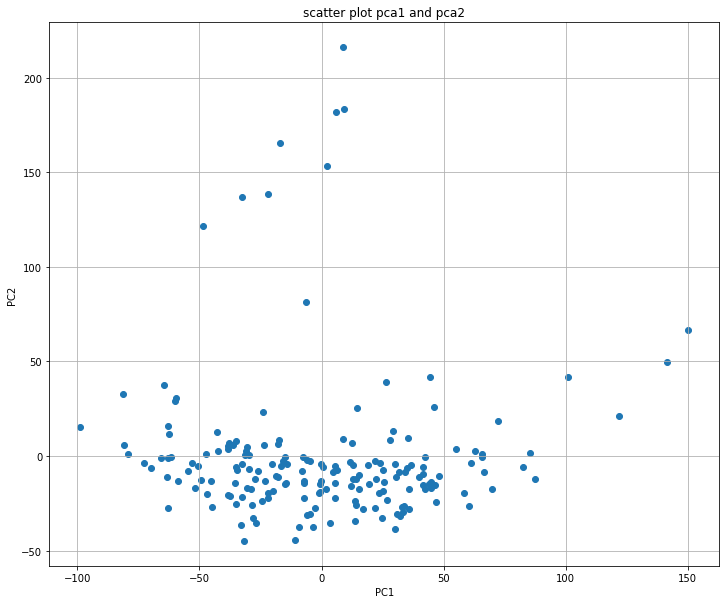

In [40]:
# Plotting the Principal component 1 vs Principal component 2 graph
plt.figure(figsize=(12,10))
plt.scatter(df_pca1['PC1'],df_pca1['PC2'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('scatter plot pca1 and pca2')
plt.grid()
plt.show()

In [41]:
# Creating a mini dataframe consist of histological_type and histological_type_other featuers becuase this two column contains 
# the info about adenocarcinoma and Neuroendocrine tumours
index = (col_data.T).loc[['histological_type','histological_type_other']]

In [42]:
index

cid,aab1-Primary solid Tumor,aab4-Primary solid Tumor,aab6-Primary solid Tumor,aab8-Primary solid Tumor,aab9-Primary solid Tumor,aaba-Primary solid Tumor,aabe-Primary solid Tumor,aabf-Primary solid Tumor,aabh-Primary solid Tumor,aabi-Primary solid Tumor,...,aauh-Primary solid Tumor,aaui-Primary solid Tumor,aaul-Primary solid Tumor,a8t3-Primary solid Tumor,a8t5-Primary solid Tumor,a89d-Solid Tissue Normal,a89d-Primary solid Tumor,a8sy-Primary solid Tumor,a8lh-Primary solid Tumor,aapl-Primary solid Tumor
chd,,,,,,,,,,,,,,,,,,,,,
histological_type,pancreas-adenocarcinoma-other subtype,pancreas-adenocarcinoma-other subtype,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma-other subtype,pancreas-adenocarcinoma-other subtype,...,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma-other subtype,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma ductal type,NaN,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma ductal type
histological_type_other,invasive adenocarcinoma,"invasive, well-differentiated",NaN,NaN,NaN,NaN,NaN,NaN,invasive adenocarcinoma,poorly differentiated adenocarcinoma,...,NaN,NaN,NaN,NaN,moderately differentiated ductal adenocarcinom...,NaN,NaN,NaN,NaN,NaN


In [43]:
# Total number of NaN's
index.isna().sum().sum()

157

In [44]:
# Finding the value which is occuring maximum number of times
index.loc['histological_type'].mode()

0    pancreas-adenocarcinoma ductal type
dtype: object

In [45]:
# Replacing the NaN's with mode also the histological_type_other have mostly NaN's value for the column for which histological_type
# value is pancreas-adenocarcinoma ductal type so repacing the NaN's for this too with "pancreas-adenocarcinoma ductal type"
index.loc['histological_type'].fillna('pancreas-adenocarcinoma ductal type',inplace=True)
index.loc['histological_type_other'].fillna('pancreas-adenocarcinoma ductal type',inplace=True)

In [46]:
index

cid,aab1-Primary solid Tumor,aab4-Primary solid Tumor,aab6-Primary solid Tumor,aab8-Primary solid Tumor,aab9-Primary solid Tumor,aaba-Primary solid Tumor,aabe-Primary solid Tumor,aabf-Primary solid Tumor,aabh-Primary solid Tumor,aabi-Primary solid Tumor,...,aauh-Primary solid Tumor,aaui-Primary solid Tumor,aaul-Primary solid Tumor,a8t3-Primary solid Tumor,a8t5-Primary solid Tumor,a89d-Solid Tissue Normal,a89d-Primary solid Tumor,a8sy-Primary solid Tumor,a8lh-Primary solid Tumor,aapl-Primary solid Tumor
chd,,,,,,,,,,,,,,,,,,,,,
histological_type,pancreas-adenocarcinoma-other subtype,pancreas-adenocarcinoma-other subtype,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma-other subtype,pancreas-adenocarcinoma-other subtype,...,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma-other subtype,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma ductal type
histological_type_other,invasive adenocarcinoma,"invasive, well-differentiated",pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma ductal type,invasive adenocarcinoma,poorly differentiated adenocarcinoma,...,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma ductal type,moderately differentiated ductal adenocarcinom...,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma ductal type


In [47]:
# Adding a label column in pca dataframe for category plot
df_pca1['label']= list(index.iloc[1])

In [48]:
df_pca1.head(2)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC103,PC104,PC105,PC106,PC107,PC108,PC109,PC110,PC111,label
0,19.377550,-14.983458,-2.223571,-29.369293,1.294303,-0.555353,-13.681499,-10.432129,-0.366908,-5.874004,...,0.809301,0.878870,8.430164,-3.712868,-0.208942,-1.379566,-8.858180,1.185587,2.934547,invasive adenocarcinoma
1,6.459746,-7.324428,-1.891171,-27.630133,-16.984564,6.185736,6.002598,-13.808450,-11.949415,-14.811034,...,3.910065,1.058807,-3.752239,2.433480,0.402649,-1.063207,2.898595,5.511106,0.132437,"invasive, well-differentiated"


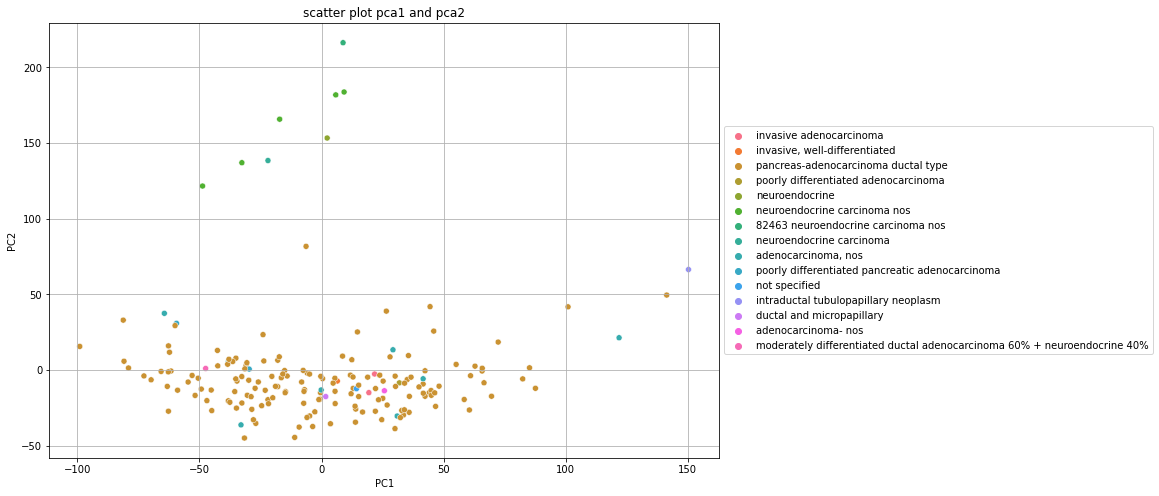

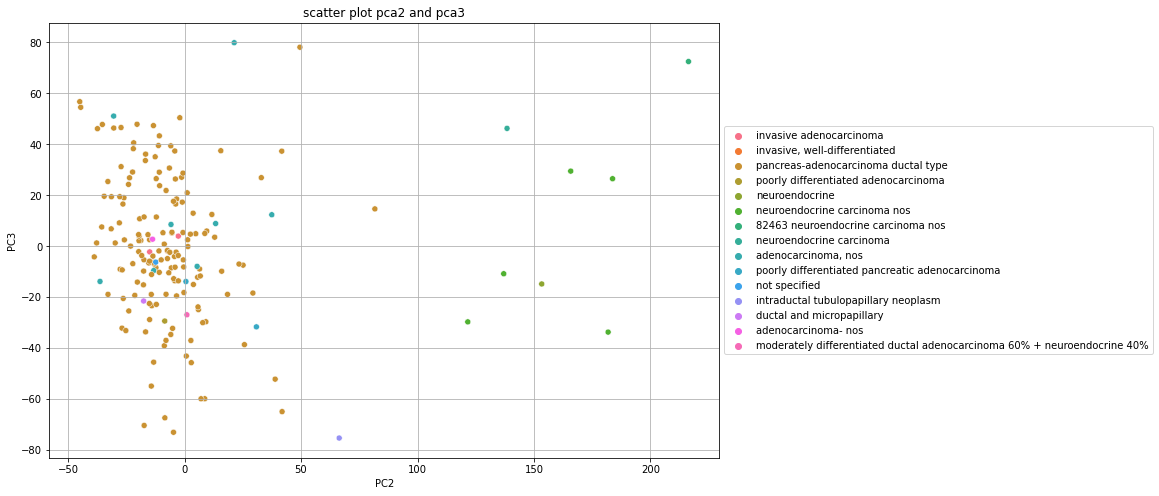

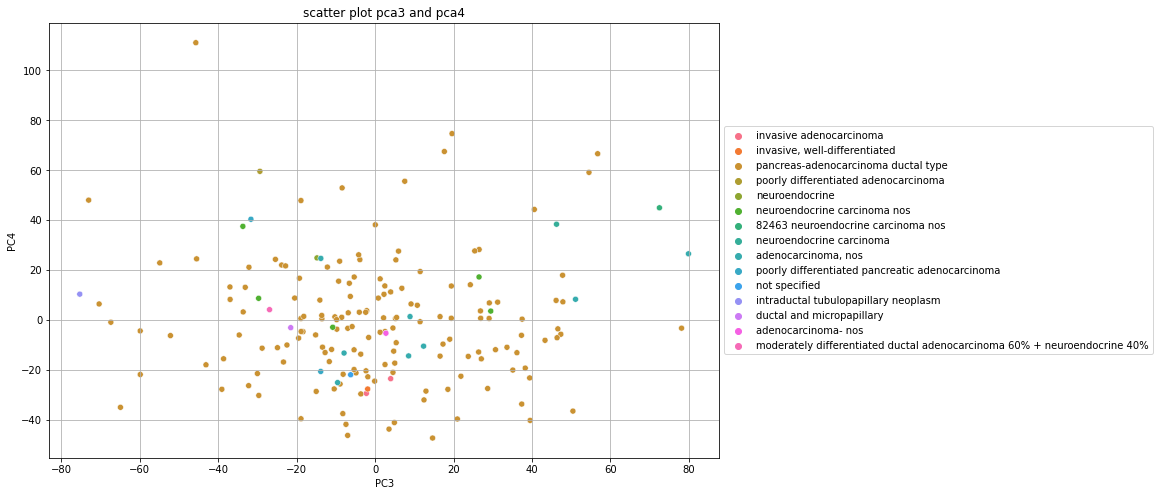

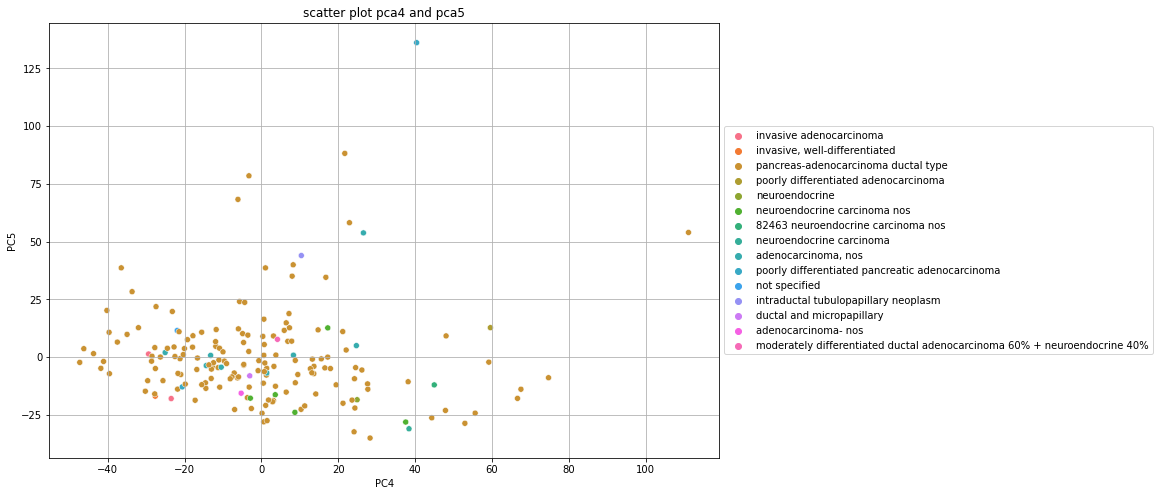

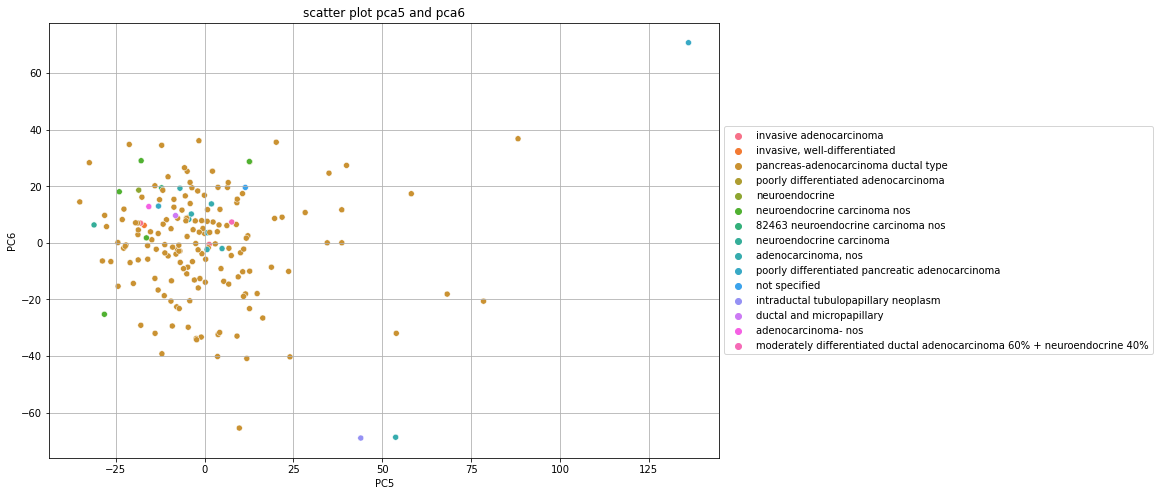

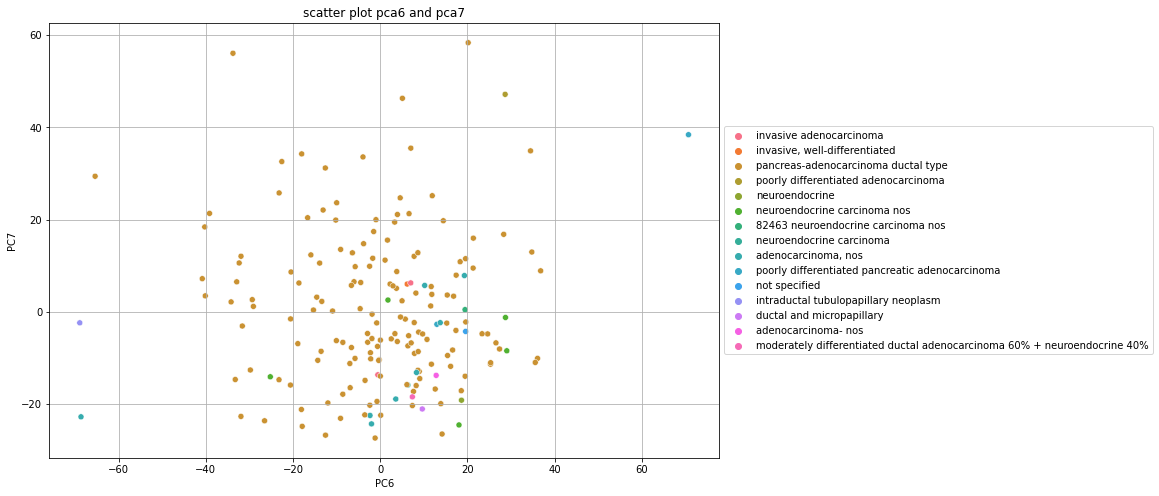

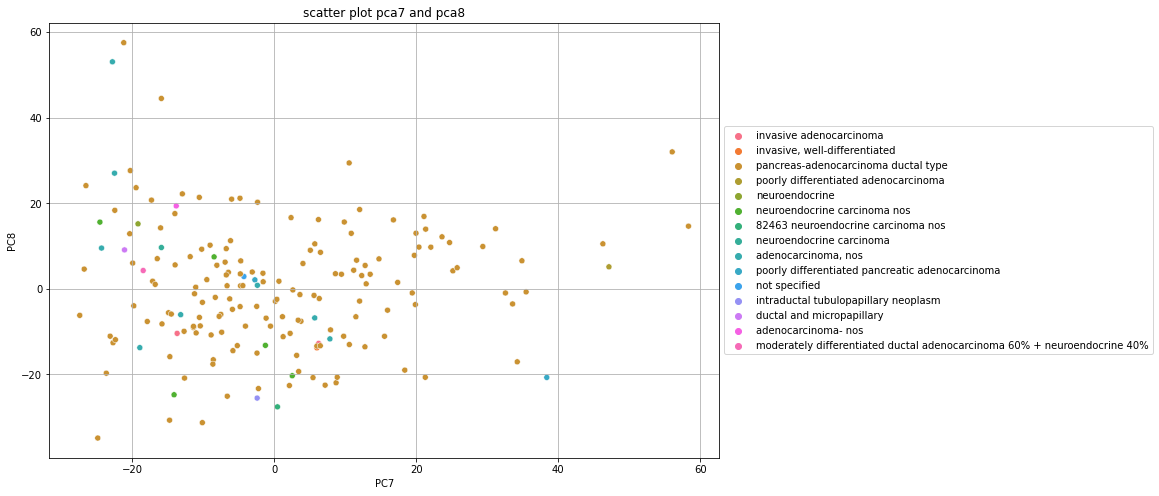

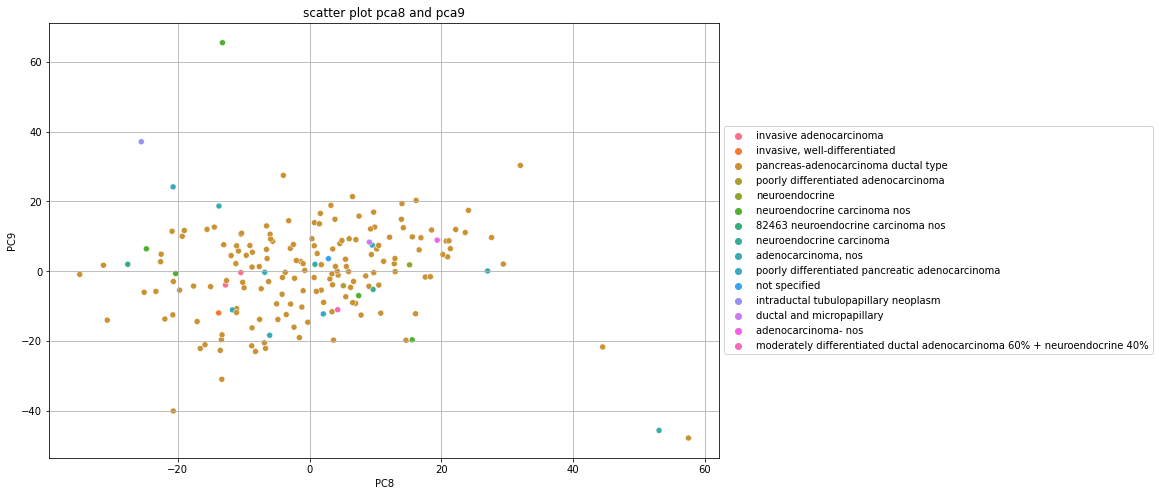

In [49]:
# Category plot for combination of 1-9 Principal components
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")
for i in range(1,9):
    plt.figure(figsize=(12,8))
    ax=sns.scatterplot(df_pca1['PC'+str(i)],df_pca1['PC'+str(i+1)],hue=df_pca1['label'])
    plt.xlabel('PC'+str(i))
    plt.ylabel('PC'+str(i+1))
    plt.title(f'scatter plot { "pca" + str(i)} and { "pca" + str(i+1)}')
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5)) 
    plt.grid()
    plt.show()

### Visualizing only PC1 vs PC2 for whole dataset

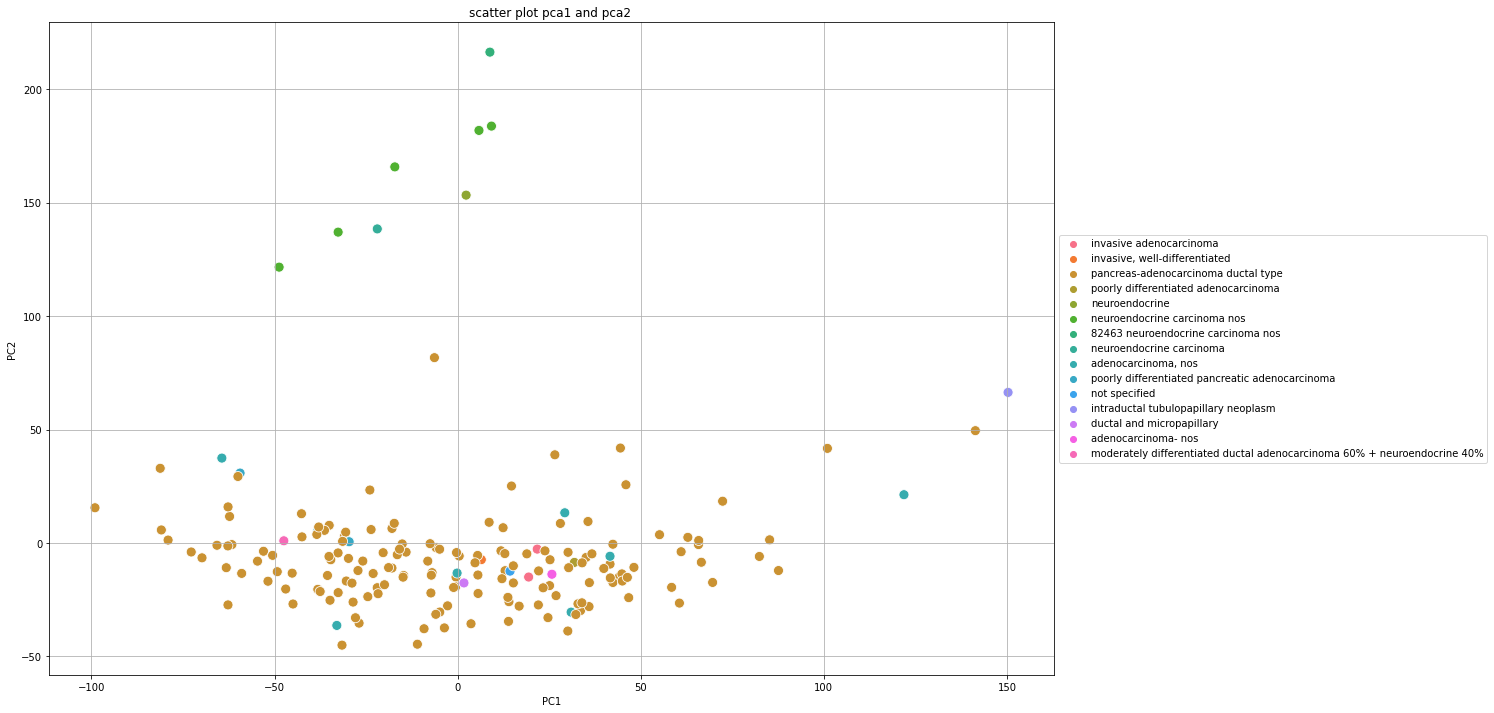

In [50]:
plt.figure(figsize=(18,12))
ax=sns.scatterplot(df_pca1['PC1'],df_pca1['PC2'],hue=df_pca1['label'], s=100)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('scatter plot pca1 and pca2 ')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5)) 
plt.grid()
plt.show()

In [51]:
df_pca1_adenocarcinoma = df_pca1.copy()

In [52]:
df_pca1_adenocarcinoma.head(2)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC103,PC104,PC105,PC106,PC107,PC108,PC109,PC110,PC111,label
0,19.377550,-14.983458,-2.223571,-29.369293,1.294303,-0.555353,-13.681499,-10.432129,-0.366908,-5.874004,...,0.809301,0.878870,8.430164,-3.712868,-0.208942,-1.379566,-8.858180,1.185587,2.934547,invasive adenocarcinoma
1,6.459746,-7.324428,-1.891171,-27.630133,-16.984564,6.185736,6.002598,-13.808450,-11.949415,-14.811034,...,3.910065,1.058807,-3.752239,2.433480,0.402649,-1.063207,2.898595,5.511106,0.132437,"invasive, well-differentiated"


### Drop the rows which contains neuroendocrine

In [53]:
without_neuroendocrine =  df_pca1_adenocarcinoma[~df_pca1_adenocarcinoma.label.str.contains("neuroendocrine")]

In [54]:
without_neuroendocrine.shape

(174, 112)

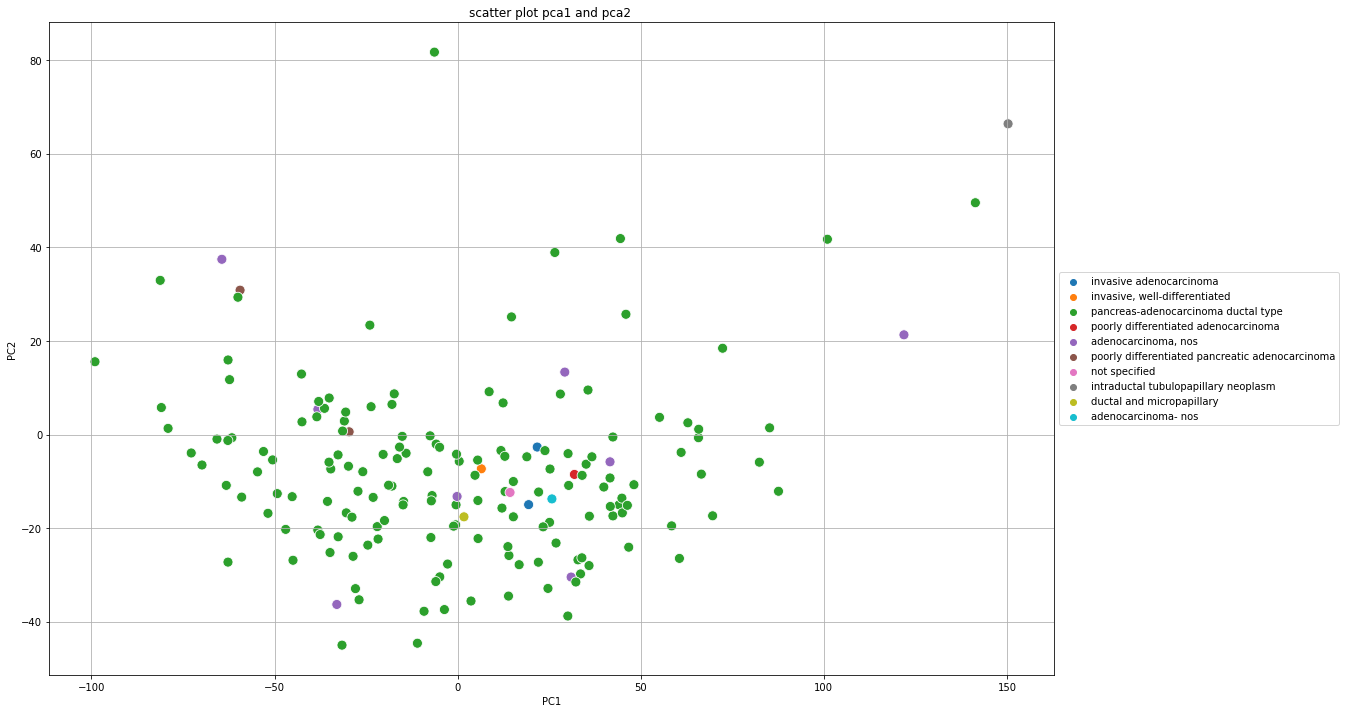

In [55]:
plt.figure(figsize=(18,12))
ax=sns.scatterplot(without_neuroendocrine['PC1'],without_neuroendocrine['PC2'],hue=without_neuroendocrine['label'], s=100)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('scatter plot pca1 and pca2 ')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5)) 
plt.grid()
plt.show()

But there are many other categories like "not specified" which looks vague if we only want adenocarcinoma.So lets chose category that only contains adenocarcinoma

### Chose the rows which contains adenocarcinoma tumors only

In [56]:

only_adenocarcinoma =  df_pca1_adenocarcinoma[df_pca1_adenocarcinoma.label.str.contains("adenocarcinoma")]

In [57]:
only_adenocarcinoma["label"].unique()

array(['invasive adenocarcinoma', 'pancreas-adenocarcinoma ductal type',
       'poorly differentiated adenocarcinoma', 'adenocarcinoma, nos',
       'poorly differentiated pancreatic adenocarcinoma',
       'adenocarcinoma- nos',
       'moderately differentiated ductal adenocarcinoma 60% + neuroendocrine 40%'],
      dtype=object)

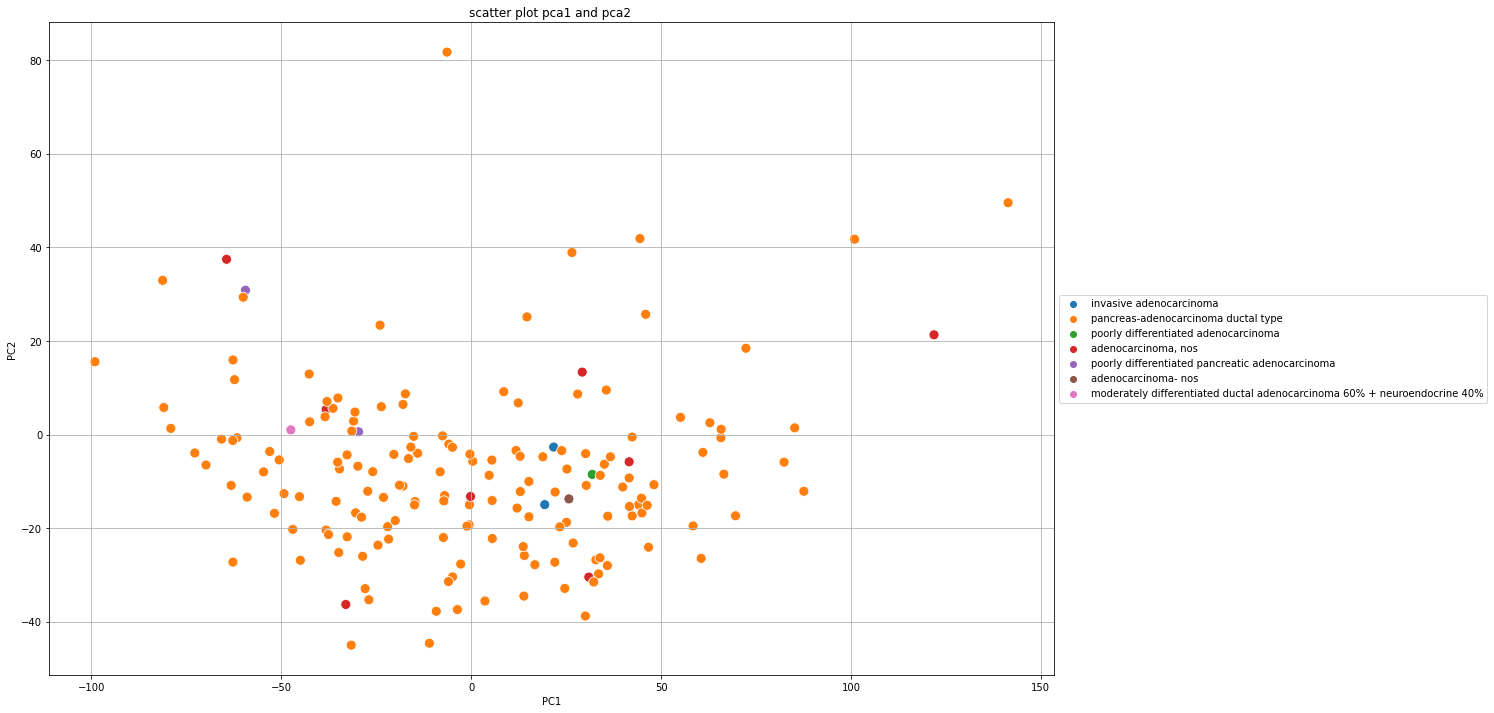

In [58]:
plt.figure(figsize=(18,12))
ax=sns.scatterplot(only_adenocarcinoma['PC1'],only_adenocarcinoma['PC2'],hue=only_adenocarcinoma['label'], s=100)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('scatter plot pca1 and pca2 ')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5)) 
plt.grid()
plt.show()
# Lets tahe 60% adenocarcinoma and 40% neuroendocrine as adenocarcinoma

### lets make a hard boundary graph ie all adenocarcinoma types as adenocarcinoma and all neuroendocrine types as neuroendocrine

In [59]:
only_adenocarcinoma["labels_a_n"] = ["adenocarcinoma" for i in range(0, len(only_adenocarcinoma))]

In [60]:
only_adenocarcinoma.head(2)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC104,PC105,PC106,PC107,PC108,PC109,PC110,PC111,label,labels_a_n
0,19.377550,-14.983458,-2.223571,-29.369293,1.294303,-0.555353,-13.681499,-10.432129,-0.366908,-5.874004,...,0.878870,8.430164,-3.712868,-0.208942,-1.379566,-8.858180,1.185587,2.934547,invasive adenocarcinoma,adenocarcinoma
2,22.106997,-12.287194,-8.406926,52.940914,-28.743156,-6.388816,12.775007,-13.569392,-22.681679,1.003894,...,-2.418264,-1.690125,0.698602,-5.463027,-2.237672,1.201113,3.602277,-0.863360,pancreas-adenocarcinoma ductal type,adenocarcinoma


####  Chose the rows which only contains neuroendocrine

In [61]:
not_adenocarcinoma =  df_pca1_adenocarcinoma[~df_pca1_adenocarcinoma.label.str.contains("adenocarcinoma")]
not_adenocarcinoma =  not_adenocarcinoma[not_adenocarcinoma.label.str.contains("neuroendocrine")]
not_adenocarcinoma["labels_a_n"] = ["neuroendocrine" for i in range(0, len(not_adenocarcinoma))]

In [62]:
not_adenocarcinoma["label"].unique()

array(['neuroendocrine', 'neuroendocrine carcinoma nos',
       '82463 neuroendocrine carcinoma nos', 'neuroendocrine carcinoma'],
      dtype=object)

In [63]:
not_adenocarcinoma.head(2)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC104,PC105,PC106,PC107,PC108,PC109,PC110,PC111,label,labels_a_n
22,2.304459,153.308960,-14.815520,24.900665,-18.526985,18.641062,-19.191526,15.184588,1.832870,-37.066025,...,0.135030,-0.799153,-0.237762,-0.303252,-0.38653,-0.201527,-0.112589,0.699146,neuroendocrine,neuroendocrine
29,5.816746,181.826416,-33.713673,37.534943,-28.190264,-25.230129,-14.112665,-24.779980,6.432024,33.261234,...,-0.937791,-0.505180,0.455747,0.684550,-0.67271,-0.403955,-0.475389,-0.492732,neuroendocrine carcinoma nos,neuroendocrine


### for PC1 and PC2

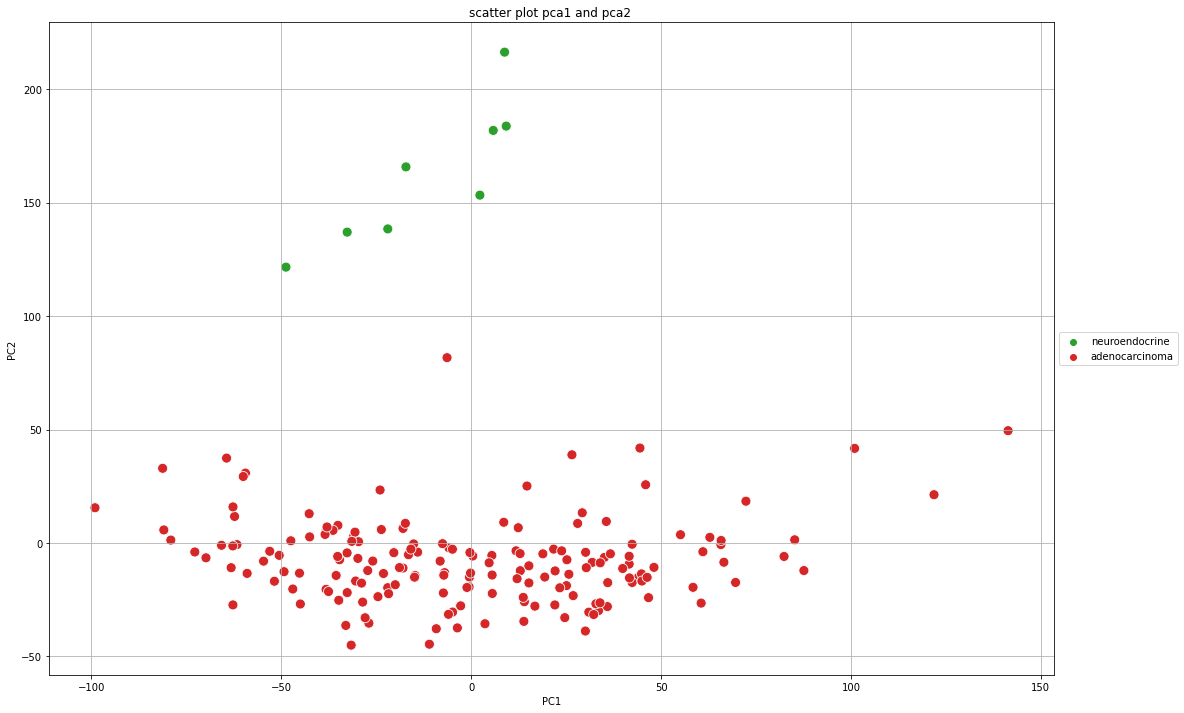

In [64]:
plt.figure(figsize=(18,12))
ax=sns.scatterplot(not_adenocarcinoma['PC1'],not_adenocarcinoma['PC2'],hue=not_adenocarcinoma['labels_a_n'], s=100,palette=["C2"])
ax=sns.scatterplot(only_adenocarcinoma['PC1'],only_adenocarcinoma['PC2'],hue=only_adenocarcinoma['labels_a_n'], s=100,palette=["C3"])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('scatter plot pca1 and pca2 ')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5)) 
plt.grid()
plt.show()
# Lets tahe 60% adenocarcinoma and 40% neuroendocrine as adenocarcinoma

## for PC2 and PC3

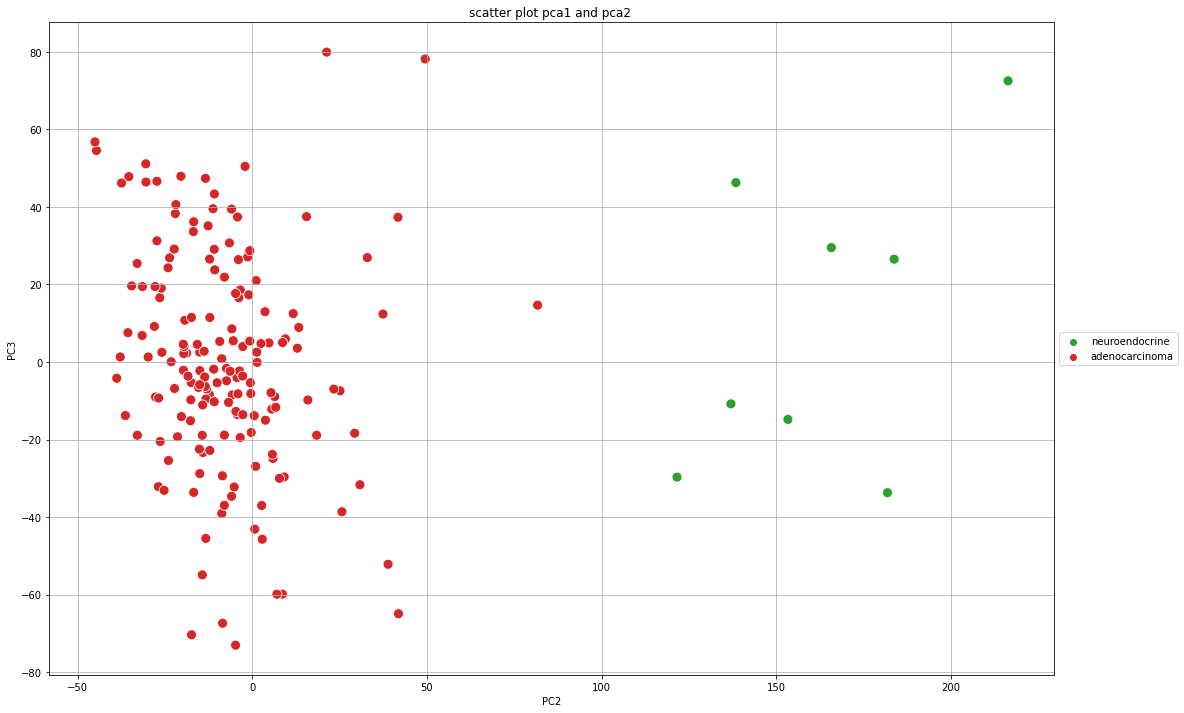

In [65]:
plt.figure(figsize=(18,12))
ax=sns.scatterplot(not_adenocarcinoma['PC2'],not_adenocarcinoma['PC3'],hue=not_adenocarcinoma['labels_a_n'], s=100,palette=["C2"])
ax=sns.scatterplot(only_adenocarcinoma['PC2'],only_adenocarcinoma['PC3'],hue=only_adenocarcinoma['labels_a_n'], s=100,palette=["C3"])
plt.xlabel('PC2')
plt.ylabel('PC3')
plt.title('scatter plot pca1 and pca2 ')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5)) 
plt.grid()
plt.show()

## for PC3 and PC4

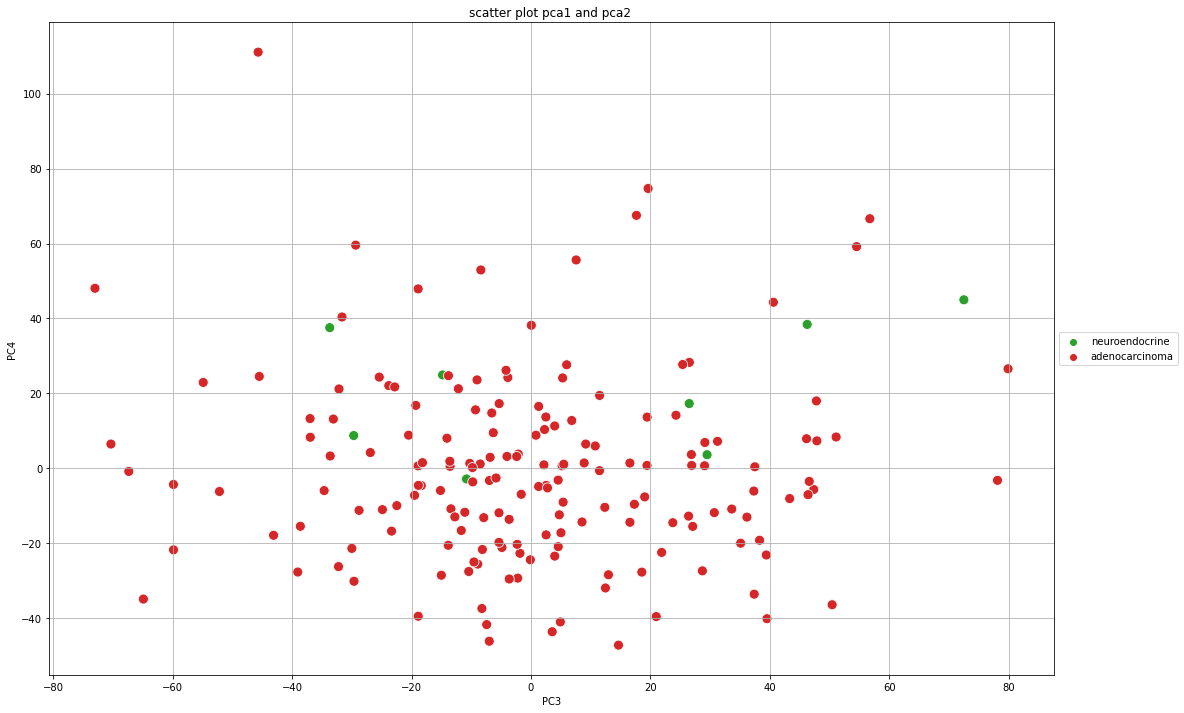

In [66]:
plt.figure(figsize=(18,12))
ax=sns.scatterplot(not_adenocarcinoma['PC3'],not_adenocarcinoma['PC4'],hue=not_adenocarcinoma['labels_a_n'], s=100,palette=["C2"])
ax=sns.scatterplot(only_adenocarcinoma['PC3'],only_adenocarcinoma['PC4'],hue=only_adenocarcinoma['labels_a_n'], s=100,palette=["C3"])
plt.xlabel('PC3')
plt.ylabel('PC4')
plt.title('scatter plot pca1 and pca2 ')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5)) 
plt.grid()
plt.show()
# Lets tahe 60% adenocarcinoma and 40% neuroendocrine as adenocarcinoma

# Points - 

### 1) From the above figure we can see that the neuroendocrine tumours and adenocarcinoma tumors are clearly separable even we are taking only PC1 and PC2 and PC2 and PC3 combination
- What I have done is that putting ('invasive adenocarcinoma', 'pancreas-adenocarcinoma ductal type',
       'poorly differentiated adenocarcinoma', 'adenocarcinoma, nos',
       'poorly differentiated pancreatic adenocarcinoma',
       'adenocarcinoma- nos') into adenocarcinoma cancer class and
       'neuroendocrine', 'neuroendocrine carcinoma nos',
       '82463 neuroendocrine carcinoma nos', 'neuroendocrine carcinoma'
       in neuroendocrine class
       
### 2) Only 111 principal components shares 95% of cummulative variance 


# Part 2 IFNs

In [114]:
# Reading all IFN signatures
with open('type1_IFN.txt', 'r') as f:
    ifn_rna = f.readlines()
ifn_rna = [x.strip() for x in ifn_rna]

In [115]:
ifn_rna

['IFIT1',
 'IFI44',
 'IFIT3',
 'MX2',
 'OAS1',
 'OAS3',
 'BST2',
 'IFITM1',
 'MX1',
 'STAT1',
 'IFI27',
 'CXCL10',
 'IFI16',
 'IFI30',
 'IFIH1',
 'IFIT2',
 'IFITM2',
 'IRF1',
 'IRF9',
 'IRGM',
 'ISG15',
 'OAS2',
 'PSME1',
 'SOCS1',
 'STAT2']

### Also we need to find IFN signature only in adenocarcinoma tumours so creating dataframe that only contains adenocarcinoma

In [116]:
len(data.data_df)

18465

In [117]:
index.T.head(2)

chd,histological_type,histological_type_other
cid,,
aab1-Primary solid Tumor,pancreas-adenocarcinoma-other subtype,invasive adenocarcinoma
aab4-Primary solid Tumor,pancreas-adenocarcinoma-other subtype,"invasive, well-differentiated"


In [118]:
ifn_adenocarcinoma =  index.T[index.T.histological_type_other.str.contains("adenocarcinoma")]

In [119]:
ifn_adenocarcinoma.head(2)

chd,histological_type,histological_type_other
cid,,
aab1-Primary solid Tumor,pancreas-adenocarcinoma-other subtype,invasive adenocarcinoma
aab6-Primary solid Tumor,pancreas-adenocarcinoma ductal type,pancreas-adenocarcinoma ductal type


In [120]:
# Saving their index 
a_index = ifn_adenocarcinoma.index

In [121]:
a_index

Index(['aab1-Primary solid Tumor', 'aab6-Primary solid Tumor',
       'aab8-Primary solid Tumor', 'aab9-Primary solid Tumor',
       'aaba-Primary solid Tumor', 'aabe-Primary solid Tumor',
       'aabf-Primary solid Tumor', 'aabh-Primary solid Tumor',
       'aabi-Primary solid Tumor', 'aabk-Primary solid Tumor',
       ...
       'aauh-Primary solid Tumor', 'aaui-Primary solid Tumor',
       'aaul-Primary solid Tumor', 'a8t3-Primary solid Tumor',
       'a8t5-Primary solid Tumor', 'a89d-Solid Tissue Normal',
       'a89d-Primary solid Tumor', 'a8sy-Primary solid Tumor',
       'a8lh-Primary solid Tumor', 'aapl-Primary solid Tumor'],
      dtype='object', name='cid', length=171)

In [122]:
print(f"The shape of dataframe contains all types of tumour { data.data_df.shape }")

The shape of dataframe contains all types of tumour (18465, 183)


In [123]:
only_adenocarcinoma_ifn = data.data_df[a_index]

In [124]:
print(f"The shape of dataframe contains only adenocarcinoma is { only_adenocarcinoma_ifn.shape }")

The shape of dataframe contains only adenocarcinoma is (18465, 171)


In [125]:
only_adenocarcinoma_ifn.head(2)

cid,aab1-Primary solid Tumor,aab6-Primary solid Tumor,aab8-Primary solid Tumor,aab9-Primary solid Tumor,aaba-Primary solid Tumor,aabe-Primary solid Tumor,aabf-Primary solid Tumor,aabh-Primary solid Tumor,aabi-Primary solid Tumor,aabk-Primary solid Tumor,...,aauh-Primary solid Tumor,aaui-Primary solid Tumor,aaul-Primary solid Tumor,a8t3-Primary solid Tumor,a8t5-Primary solid Tumor,a89d-Solid Tissue Normal,a89d-Primary solid Tumor,a8sy-Primary solid Tumor,a8lh-Primary solid Tumor,aapl-Primary solid Tumor
rid,,,,,,,,,,,,,,,,,,,,,
SLC35E2,7.45,7.2,8.0,7.65,8.1,8.2,8.2,7.55,8.45,7.5,...,8.45,7.95,8.3,8.05,8.2,7.25,7.4,7.35,7.2,9.05
A1BG,6.40,6.4,5.8,6.70,6.6,6.3,6.5,5.70,6.30,6.8,...,7.10,7.10,6.7,7.00,6.9,7.10,7.3,7.90,6.0,6.90


In [126]:
# IRGM is not present in dataset
ifn_rna.remove('IRGM')

## create a dataframe separate for IFNs

In [130]:
rna_data_ifn = (only_adenocarcinoma_ifn).loc[ifn_rna]

In [131]:
rna_data_ifn

cid,aab1-Primary solid Tumor,aab6-Primary solid Tumor,aab8-Primary solid Tumor,aab9-Primary solid Tumor,aaba-Primary solid Tumor,aabe-Primary solid Tumor,aabf-Primary solid Tumor,aabh-Primary solid Tumor,aabi-Primary solid Tumor,aabk-Primary solid Tumor,...,aauh-Primary solid Tumor,aaui-Primary solid Tumor,aaul-Primary solid Tumor,a8t3-Primary solid Tumor,a8t5-Primary solid Tumor,a89d-Solid Tissue Normal,a89d-Primary solid Tumor,a8sy-Primary solid Tumor,a8lh-Primary solid Tumor,aapl-Primary solid Tumor
rid,,,,,,,,,,,,,,,,,,,,,
IFIT1,9.5,12.2,10.7,8.6,6.7,9.0,11.4,8.5,7.2,10.6,...,8.3,7.6,9.6,8.7,9.4,8.4,9.5,10.4,11.1,10.2
IFI44,9.4,11.2,10.6,8.8,8.4,9.0,11.1,8.6,7.9,10.4,...,8.3,8.3,9.8,10.0,9.3,8.9,9.3,10.6,10.8,10.9
IFIT3,10.0,11.6,10.3,9.0,7.8,9.4,11.5,9.1,9.1,10.2,...,7.9,8.3,9.8,9.8,9.6,9.1,9.6,10.5,10.7,10.2
MX2,9.8,11.0,10.8,8.3,9.2,9.9,11.1,9.2,9.2,9.1,...,9.3,9.2,10.0,9.2,9.7,9.3,10.0,11.4,11.5,10.9
OAS1,11.7,11.3,10.5,9.2,10.6,10.5,11.4,8.9,7.5,11.2,...,8.3,9.5,10.8,8.9,9.5,10.5,10.9,11.1,11.9,10.7
OAS3,11.3,12.0,11.0,9.7,9.6,10.2,12.3,10.1,9.5,11.2,...,9.5,10.0,10.8,10.3,10.0,10.1,10.4,11.1,12.4,11.5
BST2,12.2,12.7,11.9,10.4,10.9,11.7,11.7,9.9,10.8,10.8,...,11.0,11.0,11.8,11.0,12.0,12.2,12.5,12.9,13.4,11.6
IFITM1,11.2,12.5,12.0,10.6,10.8,11.5,12.1,9.7,10.6,12.0,...,11.5,11.4,11.7,10.8,12.1,11.9,11.9,12.2,12.9,12.5
MX1,11.5,12.6,12.9,10.3,10.1,11.5,13.0,10.7,10.4,11.7,...,10.1,10.1,11.9,10.2,10.8,11.0,11.2,12.6,13.6,12.9


In [132]:
# Check if there are nans in ifn dataframe
nan_ifn_data = pd.DataFrame(data = rna_data_ifn.isna().sum()
             , columns = ['Total'])

In [133]:
nan_ifn_data

,Total
cid,
aab1-Primary solid Tumor,0
aab6-Primary solid Tumor,0
aab8-Primary solid Tumor,0
aab9-Primary solid Tumor,0
aaba-Primary solid Tumor,0
...,...
a89d-Solid Tissue Normal,0
a89d-Primary solid Tumor,0
a8sy-Primary solid Tumor,0


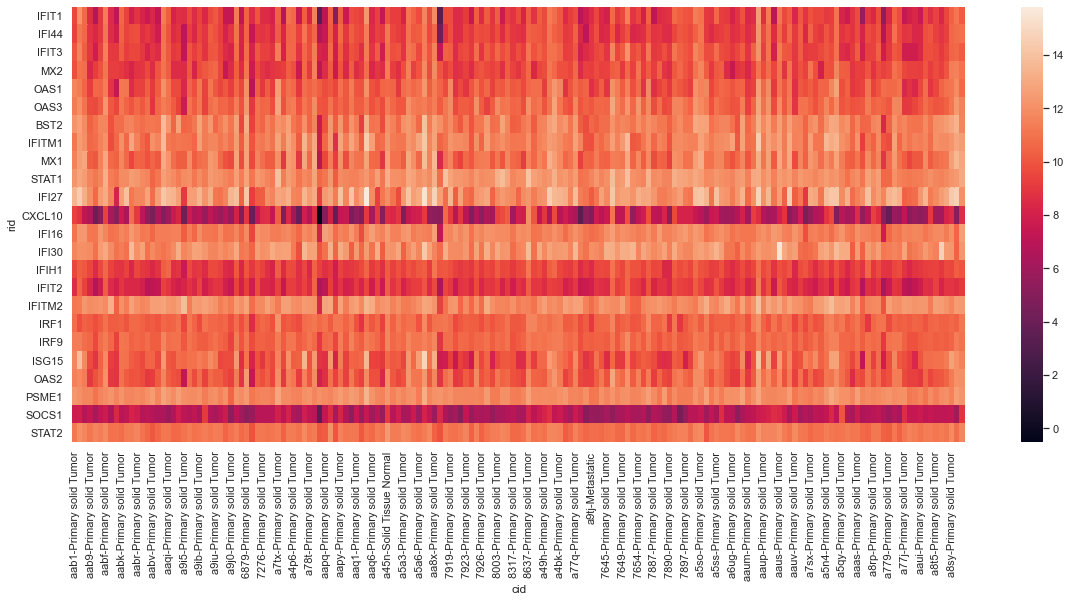

In [134]:
# Plotting a heatmap
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set_theme()
plt.figure(figsize=(20, 8))
ax = sns.heatmap(rna_data_ifn)
